In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [6]:
Patents = pd.read_csv('../Data/Patent data - PatentsView/patent.csv',sep=',')
Patents.date = pd.to_datetime(Patents.date, format='%Y-%m-%d',errors='coerce')
# 

C:\Users\Sverrir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
Patent_ownership = pd.read_csv('../Data/Patent_Ownership.csv')
Patent_ownership.columns = ['index','id','assignee_id','type','name_first','name_last','organization']

C:\Users\Sverrir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
Patents.iloc[:5]

,Unnamed: 0,id,type,number,country,date,abstract,title,kind,num_claims,filename,withdrawn
0,0,10000000,utility,10000000,US,2018-06-19,A frequency modulated (coherent) laser detecti...,Coherent LADAR using intra-pixel quadrature de...,B2,20.0,ipg180619.xml,NaN
1,1,10000001,utility,10000001,US,2018-06-19,The injection molding machine includes a fixed...,Injection molding machine and mold thickness c...,B2,12.0,ipg180619.xml,NaN
2,2,10000002,utility,10000002,US,2018-06-19,The present invention relates to: a method for...,Method for manufacturing polymer film and co-e...,B2,9.0,ipg180619.xml,NaN
3,3,10000003,utility,10000003,US,2018-06-19,The invention relates to a method for producin...,Method for producing a container from a thermo...,B2,18.0,ipg180619.xml,NaN
4,4,10000004,utility,10000004,US,2018-06-19,The present invention relates to provides a do...,"Process of obtaining a double-oriented film, c...",B2,6.0,ipg180619.xml,NaN


In [15]:
Patents = Patents.merge(Patent_ownership,how='outer',on='id')


In [18]:
Patents.to_csv('../Data/Patent data - PatentsView/patent.csv')

In [19]:
post_2018 = Patents[[(x>pd.datetime(2018,1,1)) for x in Patents.date]]

In [20]:
post_2018.to_csv('../Data/Patent data - PatentsView/subset_post_2018.csv')

In [ ]:
Patents = pd.read_csv('../Data/Patent data - PatentsView/patent.csv',sep=',')
Patents.date = pd.to_datetime(Patents.date, format='%Y-%m-%d',errors='coerce')
# 

In [10]:
# str

In [33]:


def make_plot(search_terms):
    dfs = []
    for term in search_terms:
        df_tmp_tmp = Patents.loc[[term in x for x in Patents.abstract if type(x) == type('str')]]
        dfs.append(df_tmp_tmp)
        print(len(df_tmp_tmp))
    
    df_tmp = pd.DataFrame(pd.concat(dfs))
    df_tmp.index = pd.DatetimeIndex(df_tmp.date)
    df_tmp.groupby(pd.Grouper(freq='1d')).count().id.plot()
    plt.title('daily values')
    plt.show()
    df_tmp.groupby(pd.Grouper(freq='1m')).count().id.plot()
    plt.title('monthly values')
    plt.show()
    df_tmp.groupby(pd.Grouper(freq='6m')).count().id.plot()
    plt.title('half-yearly values')
    plt.show()
    df_tmp.groupby(pd.Grouper(freq='12m')).count().id.plot()
    plt.title('yearly values')
    plt.show()

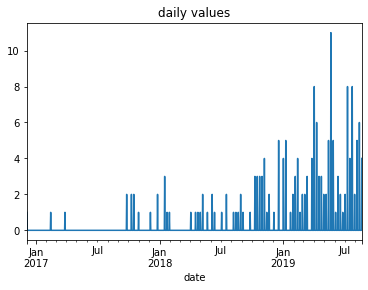

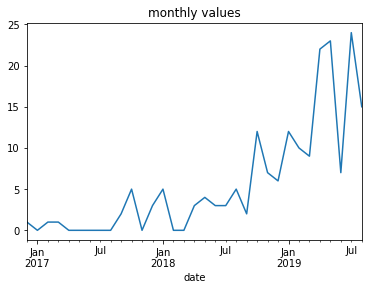

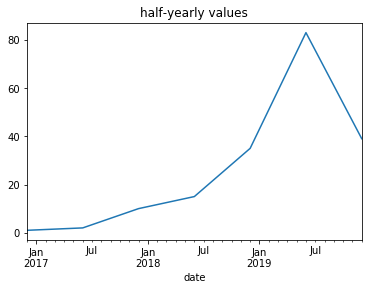

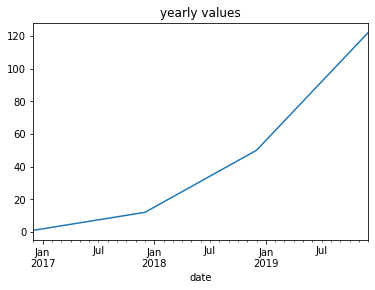

In [27]:
search_terms = ['blockchain','Blockchain']
make_plot(search_terms)

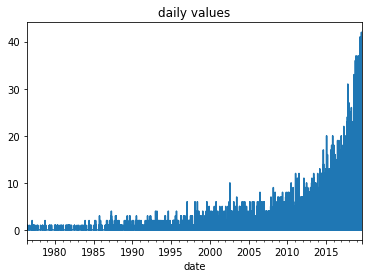

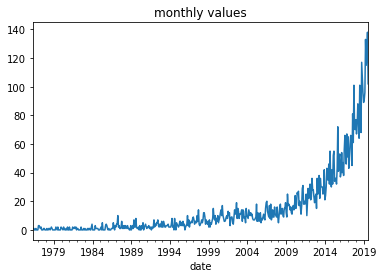

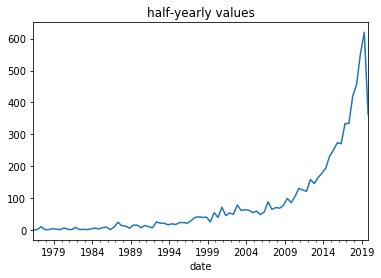

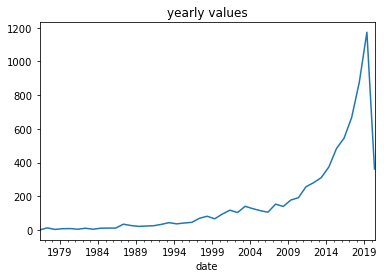

In [28]:
search_terms = ['autonomous']
make_plot(search_terms)

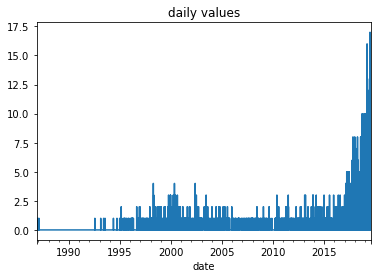

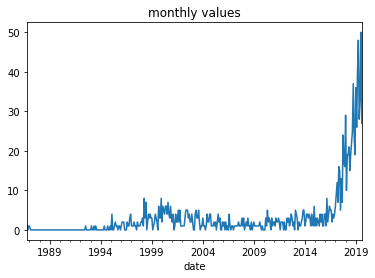

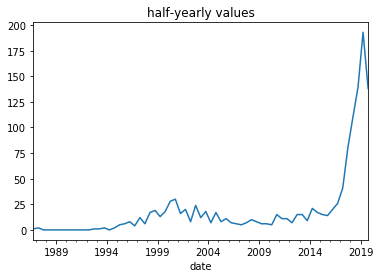

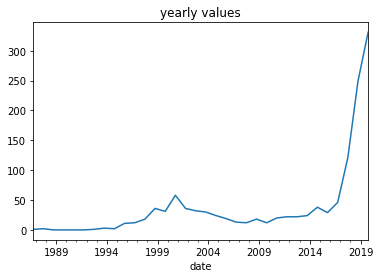

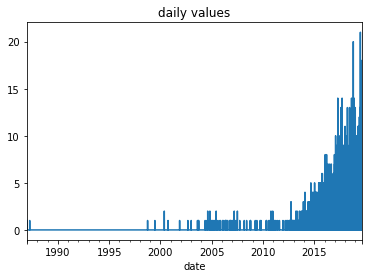

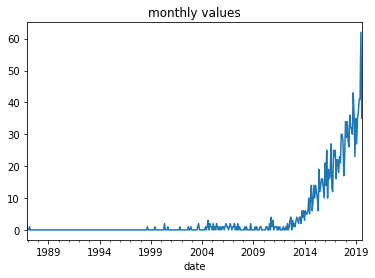

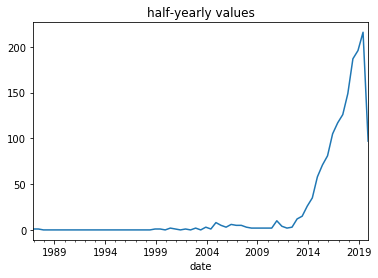

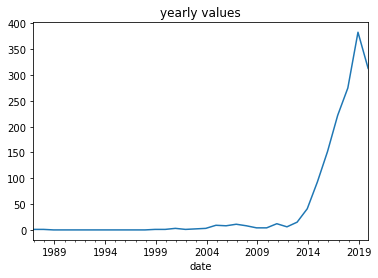

In [29]:
search_terms = ['virtual reality']
make_plot(search_terms)
search_terms = ['augmented reality']
make_plot(search_terms)

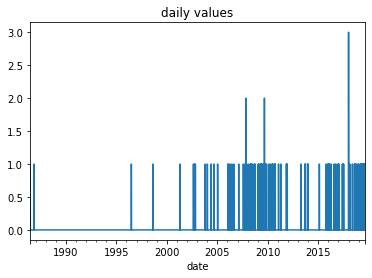

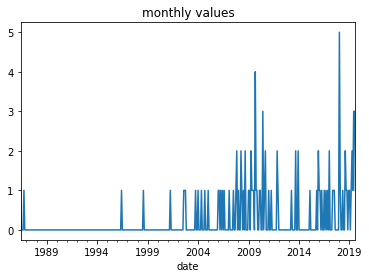

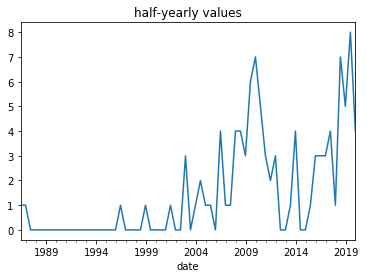

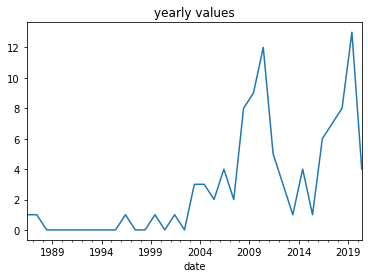

In [30]:
search_terms = ['quantum computer']
make_plot(search_terms)

15634


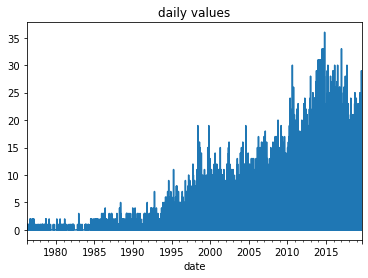

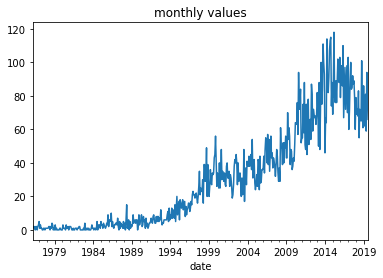

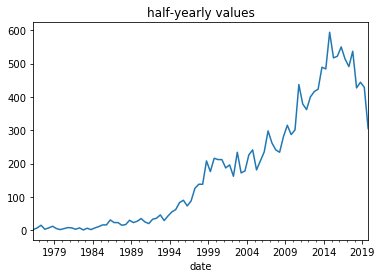

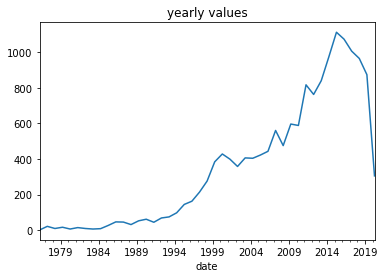

In [35]:
search_terms = ['operating system']
make_plot(search_terms)

15634


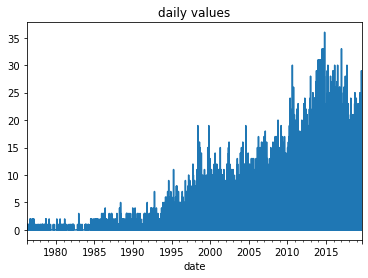

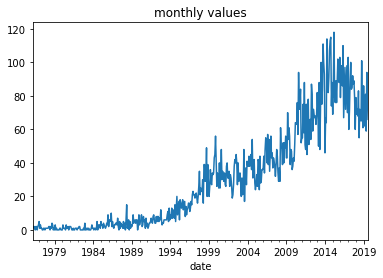

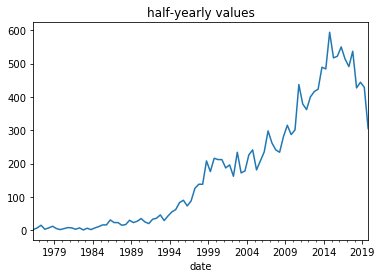

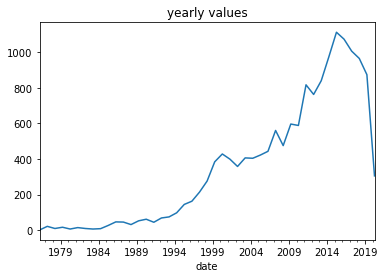

In [34]:
search_terms = ['operating system']
make_plot(search_terms)